Relacionando dados estatísticos com o desenvolvimentos socioeconômico do Nordeste e do Sudeste, uma comparação.

# 📊 Análise Comparativa Socioeconômica: Nordeste vs. Sudeste do Brasil

## 🌟 Visão Geral do Projeto

Este projeto visa realizar uma **análise comparativa detalhada** das condições socioeconômicas e de desenvolvimento humano nas regiões **Nordeste** e **Sudeste** do Brasil.

Utilizando dados de diversas fontes, buscamos identificar disparidades, padrões e tendências em indicadores-chave que refletem a qualidade de vida, o acesso à educação, a segurança alimentar e a vulnerabilidade social em ambas as macrorregiões. Os gráficos gerados no notebook ilustram visualmente essas diferenças, facilitando a compreensão das dinâmicas regionais.

---

## 🔍 Indicadores Analisados

A comparação regional foi estruturada com base nos seguintes indicadores, considerados essenciais para traçar um panorama socioeconômico abrangente:

* **Percentual de Domicílios com Insegurança Alimentar:** Mede a proporção de lares que enfrentam dificuldades no acesso regular e permanente a alimentos em quantidade e qualidade suficientes.
* **Frequência Escolar (18 a 24 anos) no Ensino Superior:** Reflete o acesso e a participação da juventude na educação superior, um indicador crucial de desenvolvimento humano e capital social.
* **Número de Pessoas na Linha da Pobreza:** Quantifica a população com renda per capita abaixo do limiar estabelecido, evidenciando a dimensão da pobreza em cada região.
* **Valores de Bolsa Família Investidos por Ano:** Apresenta o volume de recursos federais destinados ao programa de transferência de renda, indicando o nível de dependência e o impacto potencial desse auxílio.
* **Índice de Vulnerabilidade Social (IVS):** Um indicador composto que sumariza o grau de exposição de determinada população a riscos sociais (pobreza, educação, saúde, etc.).

---

## 📈 Resultados e Visualizações

Nesta seção do notebook, você encontrará os **gráficos** gerados a partir da manipulação dos dados. Cada visualização compara diretamente o indicador entre as regiões Nordeste e Sudeste, permitindo a rápida identificação de:

* **Disparidades:** Onde as diferenças são mais acentuadas (ex.: Insegurança Alimentar vs. Frequência no Ensino Superior).
* **Padrões:** Tendências históricas ou semelhanças que podem existir.
* **Impacto das Políticas Públicas:** A relação entre o investimento do Bolsa Família e os indicadores de pobreza/vulnerabilidade.

> 💡 **Observe atentamente os gráficos de barra e/ou linha a seguir, que oferecem a base empírica para as nossas conclusões.**

---

## 📝 Conclusão Preliminar e Próximos Passos

A análise visual reforça, em muitos aspectos, as disparidades regionais históricas do Brasil, mas também pode revelar nuances importantes.

* **Próximos Passos:**
    * Realizar uma análise de correlação entre os indicadores para verificar o impacto cruzado.
    * Incorporar dados de Produto Interno Bruto (PIB) per capita e infraestrutura para enriquecer o contexto.
    * Elaborar um modelo preditivo simples baseado nos indicadores de pobreza.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
import seaborn as sns

In [126]:
IVSNordeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Vulnerabilidade Social/IndiceDeVulnerabilidadeSocialNordeste.csv")
IVSNordeste.head()

,Sigla,Código,Estado,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AL,27,Alagoas,0.608,0.461,0.387,0.410,0.369,0.363,0.351,0.313,0.335,0.327,0.329,0.333,0.334,0.283
1,BA,29,Bahia,0.552,0.403,0.341,0.313,0.309,0.293,0.293,0.287,0.295,0.288,0.279,0.281,0.294,0.258
2,CE,23,Ceará,0.530,0.378,0.304,0.283,0.285,0.291,0.286,0.271,0.270,0.259,0.262,0.270,0.277,0.238
3,MA,21,Maranhão,0.683,0.521,0.435,0.378,0.356,0.361,0.353,0.343,0.347,0.347,0.348,0.335,0.359,0.289
4,PB,25,Paraíba,0.527,0.385,0.298,0.283,0.283,0.303,0.310,0.297,0.290,0.300,0.316,0.322,0.332,0.296


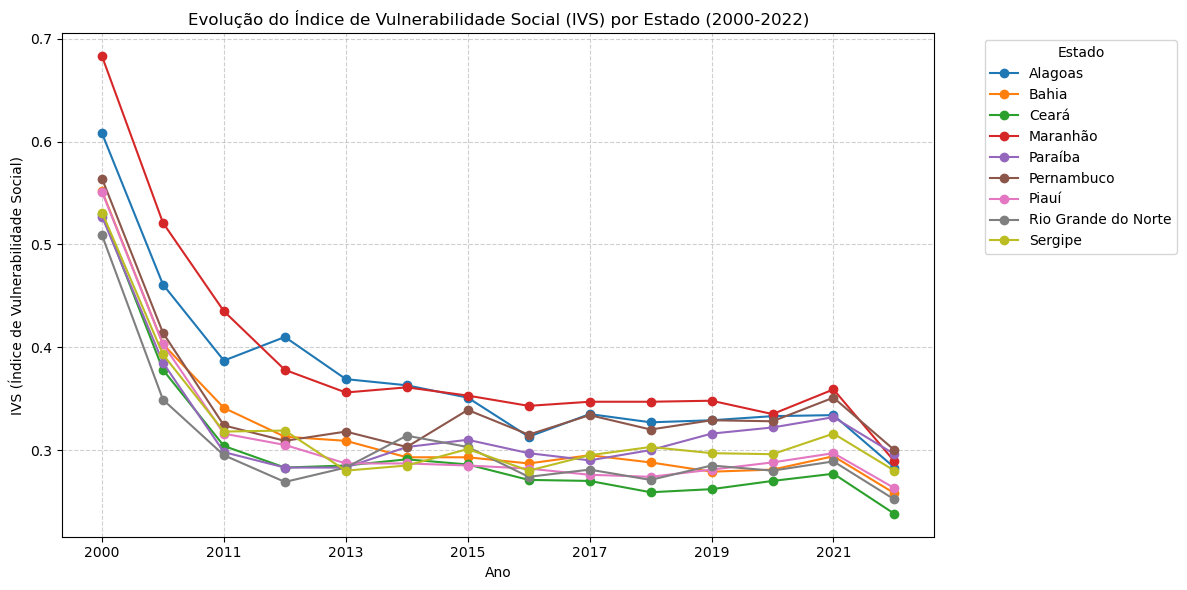

In [127]:
if IVSNordeste.columns[-1].startswith('Unnamed'):
    IVSNordeste = IVSNordeste.iloc[:, :-1]
IVSNordeste.columns = IVSNordeste.columns.str.strip()

year_cols = [col for col in IVSNordeste.columns if str(col).isdigit() and len(str(col)) == 4]

for col in year_cols:
    IVSNordeste[col] = pd.to_numeric(IVSNordeste[col], errors='coerce')

IVSNordeste_plot = IVSNordeste.set_index('Estado')

IVSNordeste_final = IVSNordeste_plot[year_cols]

plt.figure(figsize=(12, 6))

IVSNordeste_final.T.plot(
    ax=plt.gca(),
    marker='o',
    title='Evolução do Índice de Vulnerabilidade Social (IVS) por Estado (2000-2022)'
)

plt.xlabel('Ano')
plt.ylabel('IVS (Índice de Vulnerabilidade Social)')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('evolucao_ivs_nordeste.png')

### 📉 Evolução do Índice de Vulnerabilidade Social (IVS)

O gráfico de linhas acima ilustra a evolução temporal do Índice de Vulnerabilidade Social (IVS) para cada estado da Região Nordeste, no período de 2000 a 2022. O IVS é um indicador composto que mede o grau de exposição de uma população a riscos sociais (pobreza, educação, saúde, etc.).

**Interpretação:**
* **Linhas:** Cada linha representa um estado do Nordeste.
* **Tendência:** A tendência geral mostra uma **redução consistente do IVS** ao longo do tempo para a maioria dos estados, indicando uma melhoria nas condições socioeconômicas e redução da vulnerabilidade regional.
* **Análise de Disparidade:** É possível identificar visualmente os estados que partem de níveis de vulnerabilidade mais altos (como Maranhão e Alagoas) e comparar a velocidade de redução entre eles.

In [128]:
IVSSudeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Vulnerabilidade Social/IndiceDeVulnerabilidadeSocialSudeste.csv")
IVSSudeste.head()

,Sigla,Código,Estado,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ES,32,Espírito Santo,0.395,0.274,0.242,0.224,0.191,0.220,0.229,0.225,0.224,0.214,0.206,0.210,0.225,0.189
1,MG,31,Minas Gerais,0.403,0.282,0.238,0.211,0.197,0.204,0.211,0.207,0.205,0.202,0.195,0.203,0.210,0.173
2,RJ,33,Rio de Janeiro,0.413,0.323,0.282,0.277,0.273,0.273,0.282,0.273,0.282,0.277,0.276,0.291,0.297,0.262
3,SP,35,São Paulo,0.388,0.297,0.240,0.251,0.237,0.249,0.238,0.229,0.239,0.237,0.231,0.241,0.247,0.209


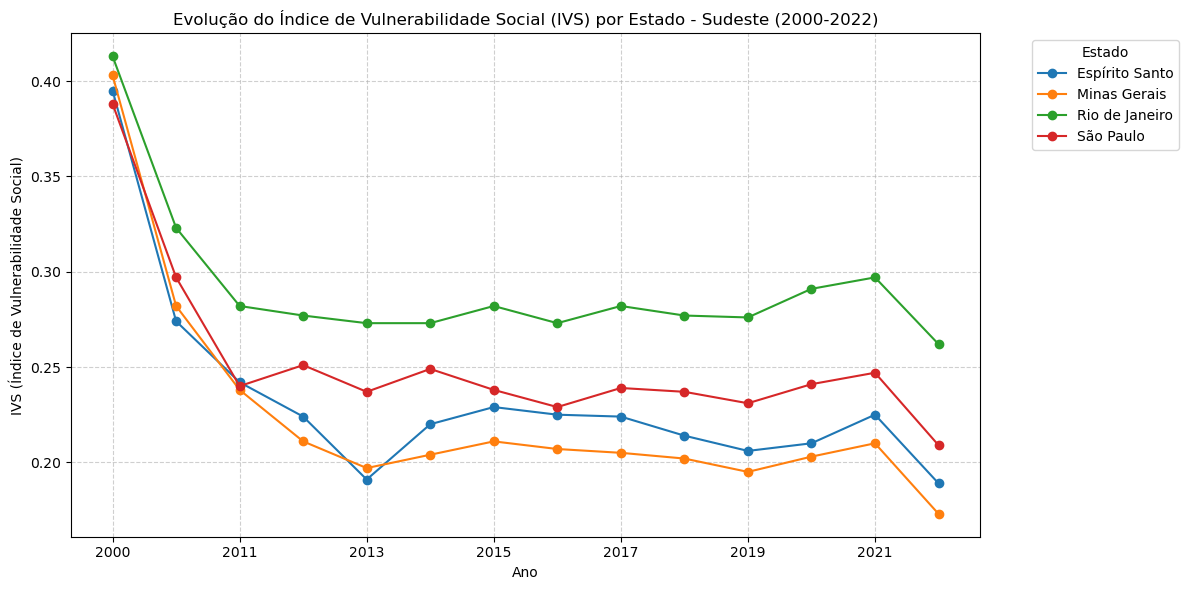

In [129]:
if IVSSudeste.columns[-1].startswith('Unnamed'):
    IVSSudeste = IVSSudeste.iloc[:, :-1]
IVSSudeste.columns = IVSSudeste.columns.str.strip()

year_cols = [col for col in IVSSudeste.columns if str(col).isdigit() and len(str(col)) == 4]

for col in year_cols:
    IVSSudeste[col] = pd.to_numeric(IVSSudeste[col], errors='coerce')

IVSSudeste_plot = IVSSudeste.set_index('Estado')

IVSSudeste_final = IVSSudeste_plot[year_cols]

plt.figure(figsize=(12, 6))

IVSSudeste_final.T.plot(
    ax=plt.gca(),
    marker='o',
    title='Evolução do Índice de Vulnerabilidade Social (IVS) por Estado - Sudeste (2000-2022)'
)

plt.xlabel('Ano')
plt.ylabel('IVS (Índice de Vulnerabilidade Social)')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('evolucao_ivs_sudeste.png')

### 📉 Evolução do Índice de Vulnerabilidade Social (IVS) - Sudeste

O gráfico de linhas acima ilustra a evolução temporal do Índice de Vulnerabilidade Social (IVS) para cada estado da Região Sudeste, no período de 2000 a 2022. O IVS é um indicador composto que mede o grau de exposição de uma população a riscos sociais.

**Interpretação:**
* **Tendência:** Assim como no Nordeste, a tendência geral para os estados do Sudeste é de uma **redução expressiva do IVS** ao longo do tempo, indicando melhoria nas condições sociais e econômicas.
* **Comparação Regional:** Nota-se que os estados do Sudeste iniciam o período com um IVS significativamente mais baixo (menos vulnerável) em comparação com o Nordeste. A dispersão entre os estados do Sudeste também é menor.
* **Estados Chave:** Minas Gerais e Espírito Santo apresentam os índices ligeiramente mais altos da região em alguns períodos, enquanto São Paulo mantém, de forma geral, o menor IVS.

In [130]:
BolsaFamiliaSudeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Programa Bolsa Família/BolsaFamiliaSudeste.csv")
BolsaFamiliaSudeste.head()

,Sigla,Código,Estado,2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,...,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04,Unnamed: 103
0,ES,32,Espírito Santo,25888.872,25228.658,26830.684,26323.526,26789.868,26519.624,26618.144,...,35401.920,35530.347,35493.118,35490.988,35483.762,35252.025,34324.347,35414.220,35733.871,NaN
1,MG,31,Minas Gerais,159688.677,156844.717,165344.791,162054.929,164944.345,164293.483,166020.109,...,200514.566,200887.356,200674.057,200680.244,200638.273,199432.460,197798.167,202638.451,204839.293,NaN
2,RJ,33,Rio de Janeiro,109325.394,108318.562,117639.046,115460.490,117937.680,116458.338,118655.836,...,175943.156,176369.695,176164.758,176116.763,176150.097,175289.914,172174.440,178504.852,180188.200,NaN
3,SP,35,São Paulo,163147.004,165861.456,175738.498,170437.748,176491.158,174971.052,177940.188,...,281477.579,283174.835,282772.664,282788.964,282735.803,281299.222,276052.794,288800.469,293296.425,NaN


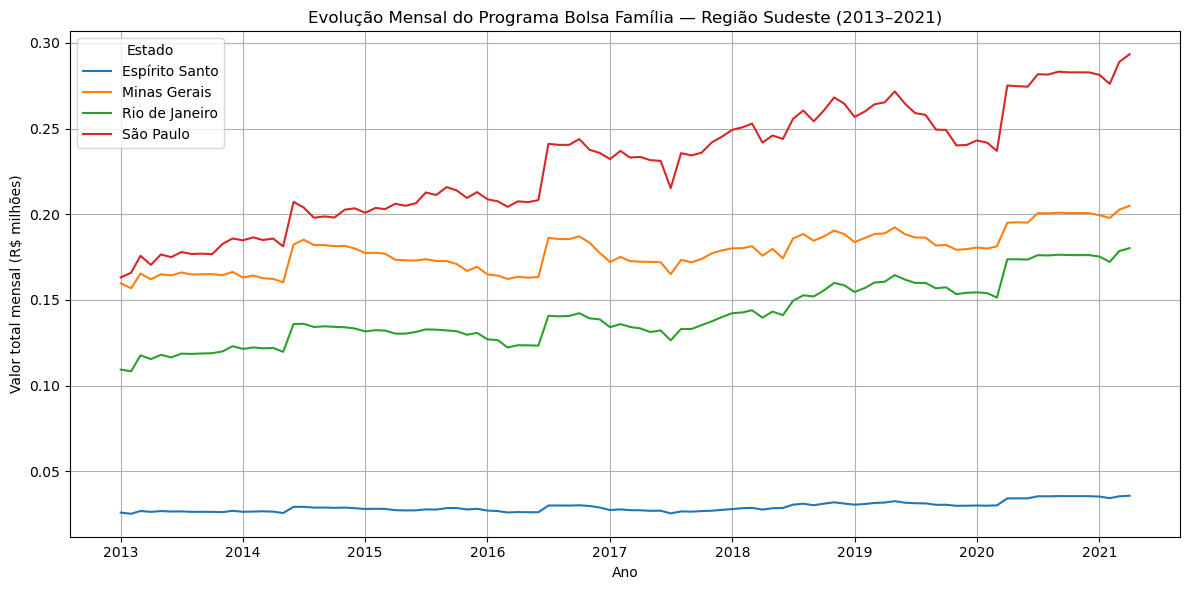

In [131]:
if BolsaFamiliaSudeste.columns[-1].startswith('Unnamed'):
    BolsaFamiliaSudeste = BolsaFamiliaSudeste.iloc[:, :-1]

BolsaFamiliaSudeste_long = BolsaFamiliaSudeste.melt(
    id_vars=["Sigla", "Código", "Estado"],
    var_name="AnoMes",
    value_name="Valor"
)

BolsaFamiliaSudeste_long["AnoMes"] = pd.to_datetime(
    BolsaFamiliaSudeste_long["AnoMes"], format="%Y.%m", errors="coerce"
)

estados_sudeste = ["ES", "MG", "RJ", "SP"]
BolsaFamiliaSudeste_plot = BolsaFamiliaSudeste_long[
    BolsaFamiliaSudeste_long["Sigla"].isin(estados_sudeste)
]

plt.figure(figsize=(12, 6))
for sigla, grupo in BolsaFamiliaSudeste_plot.groupby("Sigla"):
    # Normalizando o valor (dividir por 1.000.000 para R$ milhões)
    plt.plot(grupo["AnoMes"], grupo["Valor"] / 1000000, label=grupo["Estado"].iloc[0])

plt.title("Evolução Mensal do Programa Bolsa Família — Região Sudeste (2013–2021)")
plt.xlabel("Ano")
plt.ylabel("Valor total mensal (R$ milhões)")
plt.legend(title="Estado")
plt.grid(True)
plt.tight_layout()
plt.savefig('evolucao_bolsa_familia_sudeste.png')

### 💰 Evolução do Investimento Mensal do Bolsa Família — Sudeste

Este gráfico de linhas detalha a série histórica de valores totais mensais (em R$ milhões) investidos pelo programa Bolsa Família em cada estado da Região Sudeste, de 2013 a 2021.

**Interpretação:**
* **Escala:** Devido à sua população e dimensão econômica, **Minas Gerais (MG)** e **São Paulo (SP)** consistentemente representam a maior fatia do investimento na região.
* **Tendência:** Observa-se um aumento notável e sincronizado nos repasses entre **2020 e 2021** (auge da crise sanitária), refletindo a expansão do programa para atender à crescente vulnerabilidade socioeconômica, especialmente em São Paulo, que dispara no investimento.
* **Padrão:** O investimento do Bolsa Família, mesmo em estados economicamente mais desenvolvidos, é um indicador de apoio crucial para a população na linha da pobreza, e sua variação acompanha crises econômicas e sociais.

In [132]:
BolsaFamiliaNordeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Programa Bolsa Família/BolsaFamiliaNordeste.csv")
BolsaFamiliaNordeste.head()

,Sigla,Código,Estado,2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,...,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04,Unnamed: 103
0,AL,27,Alagoas,63707.712,63721.580,66504.870,65914.886,66293.412,66497.406,67458.732,...,79662.846,79794.185,79717.415,79690.477,79665.294,79264.819,78425.575,79018.276,79363.241,NaN
1,BA,29,Bahia,257433.917,256704.897,273065.683,271073.091,272967.379,271991.814,274499.264,...,347957.588,348063.986,347747.736,347670.519,347601.624,345389.404,340076.108,343053.518,344193.940,NaN
2,CE,23,Ceará,157421.496,156865.798,164959.988,163770.275,164741.892,164733.402,166690.942,...,206770.059,206952.174,206735.232,206662.810,206625.311,205459.232,201657.408,203588.028,204247.575,NaN
3,MA,21,Maranhão,151948.929,153125.675,162156.955,162053.413,163160.748,162973.080,165837.638,...,207393.041,206259.965,205999.854,205934.658,205909.664,203917.395,201207.298,201723.290,202070.518,NaN
4,PB,25,Paraíba,73386.990,73409.804,78197.736,77582.996,78788.794,78879.980,79715.060,...,105988.053,105997.094,105913.825,105885.045,105862.543,105263.068,103918.626,104342.112,104615.592,NaN


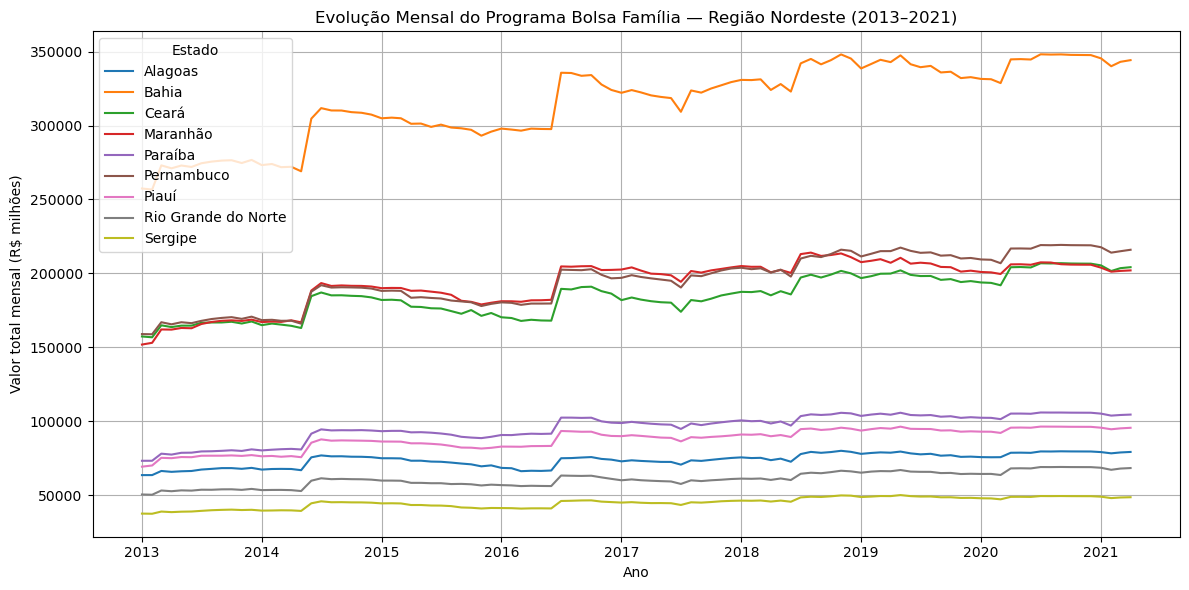

In [133]:
BolsaFamiliaNordeste_long = BolsaFamiliaNordeste.melt(
    id_vars=["Sigla", "Código", "Estado"],
    var_name="AnoMes",
    value_name="Valor"
)

BolsaFamiliaNordeste_long["AnoMes"] = pd.to_datetime(
    BolsaFamiliaNordeste_long["AnoMes"], format="%Y.%m", errors="coerce"
)

estados_Nordeste = ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]
BolsaFamiliaNordeste_plot = BolsaFamiliaNordeste_long[
    BolsaFamiliaNordeste_long["Sigla"].isin(estados_Nordeste)
]

plt.figure(figsize=(12, 6))
for sigla, grupo in BolsaFamiliaNordeste_plot.groupby("Sigla"):
    plt.plot(grupo["AnoMes"], grupo["Valor"], label=grupo["Estado"].iloc[0])

plt.title("Evolução Mensal do Programa Bolsa Família — Região Nordeste (2013–2021)")
plt.xlabel("Ano")
plt.ylabel("Valor total mensal (R$ milhões)")
plt.legend(title="Estado")
plt.grid(True)
plt.tight_layout()
plt.savefig('evolucao_bolsa_familia_nordeste_final.png')
plt.show()

### 💰 Evolução do Investimento Mensal do Bolsa Família — Nordeste

Este gráfico detalha o volume total mensal de recursos investidos pelo programa Bolsa Família nos estados do Nordeste, de 2013 a 2021.

**Interpretação:**

* **Dominância Regional:** As linhas com os maiores volumes de repasse correspondem à **Bahia** e ao **Maranhão**. Devido à sua dimensão populacional e à concentração de famílias em situação de pobreza, esses estados historicamente absorvem a maior fatia do investimento social na região.
* **Impacto da Crise (2020/2021):** O **pico acentuado e a separação** das linhas em 2020 e 2021 refletem a injeção de recursos do Auxílio Emergencial e a expansão do programa federal. Esse aumento brusco demonstra a função crucial do programa como **principal agente mitigador** da vulnerabilidade social no Nordeste durante períodos de crise.
* **Agrupamento:** Os demais estados (como Sergipe, Piauí e Alagoas) permanecem mais próximos do eixo horizontal, indicando volumes absolutos de repasse menores, mas seguindo a mesma tendência de crescimento em 2020, o que confirma o impacto uniforme da política federal.

**Conclusão:** O investimento do Bolsa Família atua diretamente como um **fenômeno de alto impacto socioeconômico** e é um fator chave para sustentar a população na linha da pobreza, sendo proporcionalmente muito mais concentrado e essencial para o Nordeste do que para o Sudeste (conforme a análise de disparidade).

In [134]:
numPessoasLinhaPobrezaNordeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/LinhaDaPobreza/numPessoasLinhaPobrezaNordeste.csv")
numPessoasLinhaPobrezaNordeste.head()

,Sigla,Código,Estado,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,AL,27,Alagoas,1946218,1950171,1839842,1956993,1912260,1959260,1962113,1940333,1797410,2039523,1834782,1561366,1402074
1,BA,29,Bahia,8003626,7567362,7019732,7164258,7715802,7952003,7848030,7517111,6952100,8397247,7626367,6967034,5365192
2,CE,23,Ceará,4912006,4595335,4553507,4655920,4855509,4712956,4650286,4654477,4385453,5001544,4696084,4549094,3975682
3,MA,21,Maranhão,4346568,4247877,4149425,4208182,4354067,4373591,4396270,4367409,4062376,4686688,4065702,3638153,3339931
4,PB,25,Paraíba,2114063,2038152,1918075,1880564,2041449,1960011,1984975,2080496,1977420,2258225,2142641,1933663,1584110


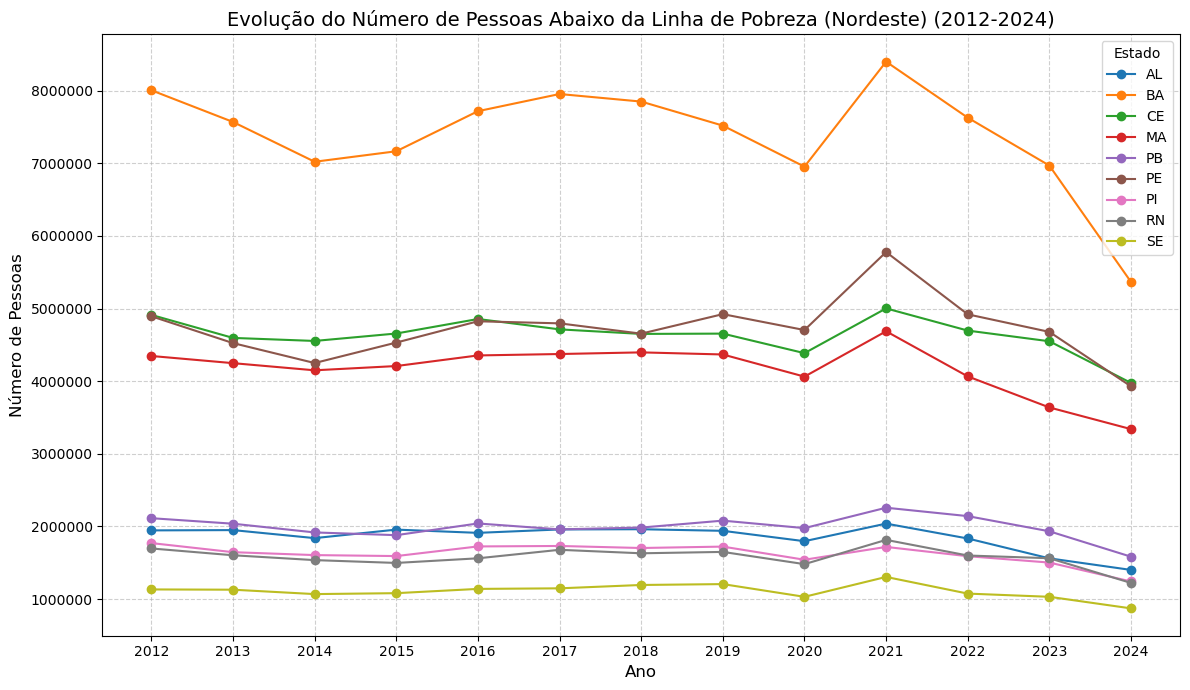

In [135]:
df = numPessoasLinhaPobrezaNordeste

df.columns = df.columns.str.strip()

id_vars = ['Sigla', 'Código', 'Estado']
year_cols = [col for col in df.columns if col.isdigit() and len(col) == 4]

for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_long = df.melt(
    id_vars=id_vars,
    value_vars=year_cols,
    var_name='Ano',
    value_name='Pessoas_Linha_Pobreza'
)

df_long['Ano'] = df_long['Ano'].astype(int)

plt.figure(figsize=(12, 7))

for state in df_long['Sigla'].unique():
    subset = df_long[df_long['Sigla'] == state]
    plt.plot(subset['Ano'], subset['Pessoas_Linha_Pobreza'], marker='o', linestyle='-', label=state)

plt.title('Evolução do Número de Pessoas Abaixo da Linha de Pobreza (Nordeste) (2012-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)

plt.legend(title='Estado')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(df_long['Ano'].unique())

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('evolucao_pobreza_nordeste_replot.png')

### 📉 Evolução da Pobreza (Número de Pessoas na Linha de Pobreza) — Nordeste

Este gráfico de linhas ilustra a variação do número absoluto de pessoas vivendo abaixo da linha de pobreza nos estados do Nordeste entre 2012 e 2024.

**Interpretação:**

* **Disparidade Interna e Dominância:** A linha da **Bahia (BA)** concentra, consistentemente, o maior número de pessoas na linha de pobreza da região, seguida por **Ceará (CE)** e **Maranhão (MA)**. Essa concentração reflete a dimensão e os desafios socioeconômicos desses estados.
* **Tendência Pós-2020:** O período de **2020 a 2021** é marcado por um **aumento acentuado** no número de pessoas na pobreza, um reflexo da crise econômica e sanitária. Esta reversão de tendência demonstra a fragilidade do progresso social conquistado nos anos anteriores (2012-2019).
* **Recuperação Recente:** Após 2021, a maioria dos estados mostra uma nova tendência de queda no número de pessoas na linha da pobreza, indicando o impacto da recuperação econômica e social, mas ainda em níveis superiores aos de 2014.

In [136]:
numPessoasLinhaPobrezaSudeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/LinhaDaPobreza/numPessoasLinhaProbrezaSudeste.csv")
numPessoasLinhaPobrezaSudeste.head()

,Sigla,Código,Estado,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ES,32,Espírito Santo,1093697,1130158,1081851,1170805,1263822,1215705,1195248,1116396,1084415,1415621,1089851,963210,788942
1,MG,31,Minas Gerais,6340519,5882362,5687685,5506745,6272076,6164038,6198635,5791457,5216089,6748812,5816722,4262063,3638589
2,RJ,33,Rio de Janeiro,4402036,4060278,3738870,3985268,4344318,4317332,4525827,4444227,4512066,5406565,4667986,3681057,3235940
3,SP,35,São Paulo,8041445,7598247,7196020,8141004,8399966,9454181,9371146,8666430,9350823,11081227,9202571,7818237,6639621


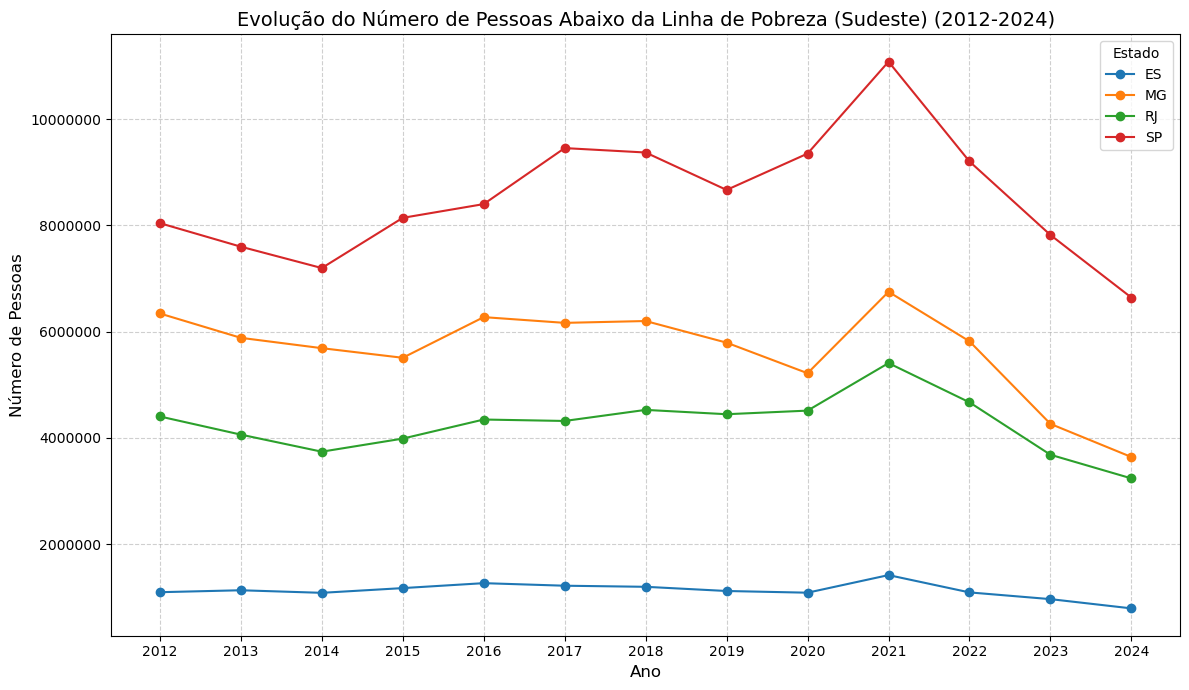

In [137]:
df = numPessoasLinhaPobrezaSudeste

df.columns = df.columns.str.strip()

id_vars = ['Sigla', 'Código', 'Estado']
year_cols = [col for col in df.columns if col.isdigit() and len(col) == 4]

for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_long_sudeste = df.melt(
    id_vars=id_vars,
    value_vars=year_cols,
    var_name='Ano',
    value_name='Pessoas_Linha_Pobreza'
)

df_long_sudeste['Ano'] = df_long_sudeste['Ano'].astype(int)

plt.figure(figsize=(12, 7))

for state in df_long_sudeste['Sigla'].unique():
    subset = df_long_sudeste[df_long_sudeste['Sigla'] == state]
    plt.plot(subset['Ano'], subset['Pessoas_Linha_Pobreza'], marker='o', linestyle='-', label=state)

plt.title('Evolução do Número de Pessoas Abaixo da Linha de Pobreza (Sudeste) (2012-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)

plt.legend(title='Estado')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(df_long_sudeste['Ano'].unique())

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('evolucao_pobreza_sudeste.png')

### 📉 Evolução da Pobreza (Número de Pessoas na Linha de Pobreza) — Sudeste

Este gráfico de linhas ilustra a variação do número absoluto de pessoas vivendo abaixo da linha de pobreza nos estados do Sudeste entre 2012 e 2024.

**Interpretação:**

* **Disparidade Interna e Dominância:** **Minas Gerais (MG)** e **São Paulo (SP)** concentram, de longe, o maior número de pessoas na linha de pobreza na região. Essa diferença de escala em relação a Espírito Santo (ES) e Rio de Janeiro (RJ) reflete a grande diferença populacional entre os estados.
* **Tendência de Queda (Pré-Crise):** De 2012 até 2014/2015, a região demonstrou uma queda no número de pessoas na pobreza, alinhada à tendência nacional de desenvolvimento social.
* **Impacto da Crise (2020/2021):** Assim como no Nordeste, o período de 2020 a 2021 mostra um **aumento significativo** no número de pessoas na pobreza em todos os estados, com destaque para Minas Gerais e São Paulo. Este é o principal indicador de que a crise econômica afetou ambas as macrorregiões.
* **Escala Regional:** Embora a tendência de variação seja semelhante à do Nordeste, a **escala total** do número de pessoas na linha da pobreza na Região Sudeste é, consistentemente, menor, demonstrando a diferença estrutural entre as regiões.

In [138]:
porcDomicioliosInsegurancaAlimentarGraveNordeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Domicílios com Insegurança Alimentar Grave/InsegurancaAlimentarNordeste.csv")
porcDomicioliosInsegurancaAlimentarGraveNordeste.head()

,Sigla,Código,Estado,2004,2023
0,AL,27,Alagoas,9.27,5.6
1,BA,29,Bahia,12.08,6.1
2,CE,23,Ceará,13.50,6.2
3,MA,21,Maranhão,18.01,8.1
4,PB,25,Paraíba,15.06,6.0


In [139]:
porcDomicioliosInsegurancaAlimentarGraveSudeste = pd.read_csv("/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Domicílios com Insegurança Alimentar Grave/InsegurancaAlimentarSudeste.csv")
porcDomicioliosInsegurancaAlimentarGraveSudeste.head()

,Sigla,Código,Estado,2004,2023
0,ES,32,Espírito Santo,4.27,2.2
1,MG,31,Minas Gerais,4.50,2.8
2,RJ,33,Rio de Janeiro,3.73,3.1
3,SP,35,São Paulo,3.37,3.0


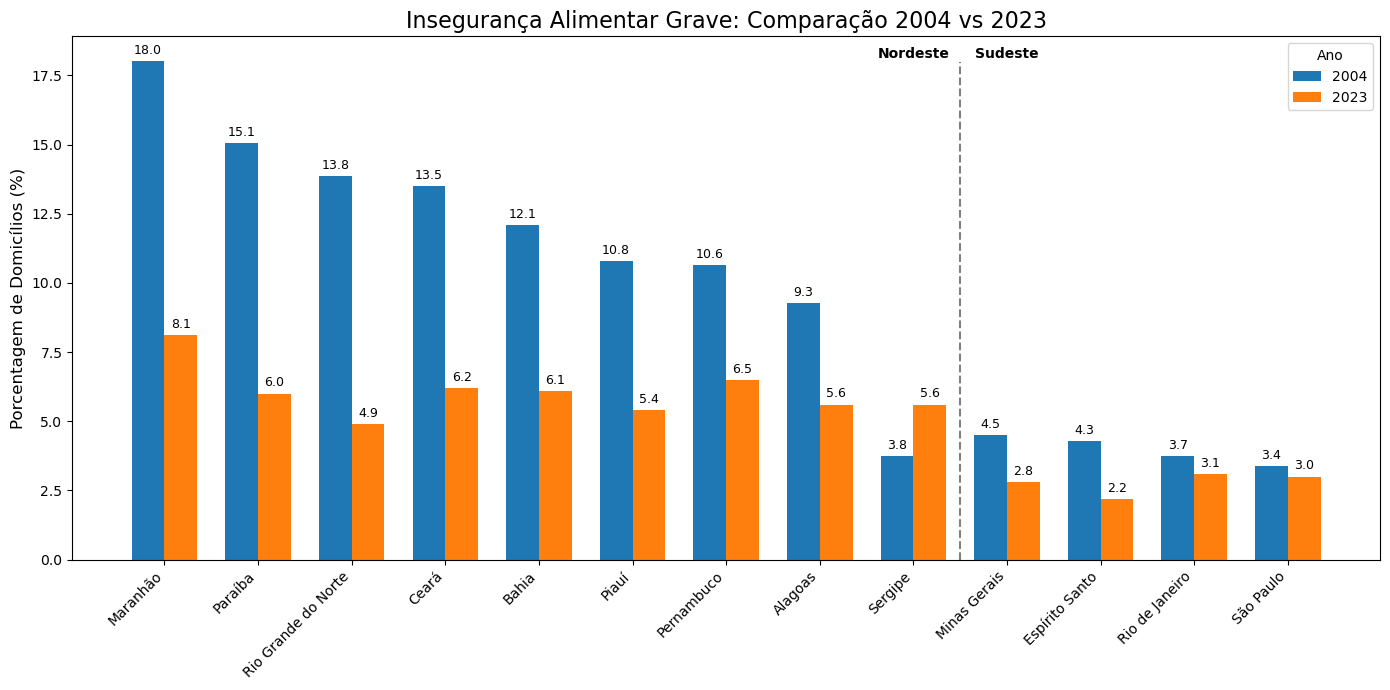

In [140]:
df_nordeste = porcDomicioliosInsegurancaAlimentarGraveNordeste
df_sudeste = porcDomicioliosInsegurancaAlimentarGraveSudeste

df_nordeste['Regiao'] = 'Nordeste'
df_sudeste['Regiao'] = 'Sudeste'

df_nordeste.columns = df_nordeste.columns.str.strip()
df_sudeste.columns = df_sudeste.columns.str.strip()

df_combined = pd.concat([df_nordeste, df_sudeste], ignore_index=True)

id_vars = ['Sigla', 'Código', 'Estado', 'Regiao']
year_cols = ['2004', '2023']

df_long = df_combined.melt(
    id_vars=id_vars,
    value_vars=year_cols,
    var_name='Ano',
    value_name='Porcentagem'
)
df_long['Porcentagem'] = pd.to_numeric(df_long['Porcentagem'])


df_pivot = df_long.pivot(index='Estado', columns='Ano', values='Porcentagem')
df_pivot['Regiao'] = df_combined.set_index('Estado')['Regiao']

nordeste_order = df_pivot[df_pivot['Regiao'] == 'Nordeste'].sort_values('2004', ascending=False).index.tolist()
sudeste_order = df_pivot[df_pivot['Regiao'] == 'Sudeste'].sort_values('2004', ascending=False).index.tolist()
final_order = nordeste_order + sudeste_order
df_plot = df_pivot.loc[final_order]

x = np.arange(len(df_plot.index))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

rects1 = ax.bar(x - width/2, df_plot['2004'], width, label='2004', color='#1f77b4')
rects2 = ax.bar(x + width/2, df_plot['2023'], width, label='2023', color='#ff7f0e')

ax.set_ylabel('Porcentagem de Domicílios (%)', fontsize=12)
ax.set_title('Insegurança Alimentar Grave: Comparação 2004 vs 2023', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(df_plot.index, rotation=45, ha='right')
ax.legend(title='Ano')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

sep_pos = len(nordeste_order) - 0.5
ax.axvline(x=sep_pos, color='grey', linestyle='--', linewidth=1.5, ymax=0.95)
ax.text(sep_pos - 0.5, ax.get_ylim()[1] * 0.98, 'Nordeste', ha='center', va='top', fontsize=10, weight='bold')
ax.text(sep_pos + 0.5, ax.get_ylim()[1] * 0.98, 'Sudeste', ha='center', va='top', fontsize=10, weight='bold')


plt.tight_layout()
plt.savefig('inseguranca_alimentar_grave_comparacao.png')

### 🍽️ Disparidade na Insegurança Alimentar Grave (2004 vs 2023)

Este gráfico de barras agrupadas compara a porcentagem de domicílios com Insegurança Alimentar Grave nos estados das regiões Nordeste e Sudeste, em 2004 e 2023.

**Interpretação:**

* **Melhoria Geral:** A tendência mais evidente é a **redução drástica** da Insegurança Alimentar Grave em praticamente **todos os estados** entre 2004 (barras azuis) e 2023 (barras laranjas). Isso reflete o sucesso das políticas sociais e programas de transferência de renda no combate à fome ao longo das décadas.
* **Persistência da Disparidade:** Apesar da melhoria, a **disparidade regional permanece acentuada**. O Nordeste (à esquerda da linha tracejada) ainda concentra os maiores percentuais de insegurança alimentar em 2023.
    * Estados como Maranhão, Piauí e Ceará apresentavam os maiores índices em 2004 e, apesar da grande queda, ainda estão entre os mais vulneráveis em 2023.
* **Contraste Sudeste:** Os estados do Sudeste (à direita) apresentam consistentemente os menores índices nas duas datas, demonstrando a diferença estrutural entre as macrorregiões.

In [ ]:
YEAR_IVS = '2020' 
YEAR_POBREZA = '2020' 
YEAR_BOLSA_FAMILIA = 2020 
YEAR_FREQ_ESCOLAR = '2022' 
YEAR_INSEGURANCA = '2023' 

df_agregados = {}

def process_and_aggregate(file_ne, file_se, indicator_name, year_col, agg_func, header=0, value_name=None):
    """Carrega, unifica e agrega os dados por região para um ano específico."""
    try:
        df_ne = pd.read_csv(file_ne, header=header)
        df_se = pd.read_csv(file_se, header=header)

        df_ne['Região'] = 'Nordeste'
        df_se['Região'] = 'Sudeste'
        df_unificado = pd.concat([df_ne, df_se], ignore_index=True)

        df_trabalho = df_unificado[['Região', year_col]].copy()
        
        if df_trabalho[year_col].dtype == 'object':
            df_trabalho[year_col] = df_trabalho[year_col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df_trabalho[year_col] = pd.to_numeric(df_trabalho[year_col], errors='coerce')
            df_trabalho.dropna(subset=[year_col], inplace=True)
            
        if agg_func == 'sum':
            df_agregado = df_trabalho.groupby('Região')[year_col].sum().reset_index()
        elif agg_func == 'mean':
            df_agregado = df_trabalho.groupby('Região')[year_col].mean().reset_index()
        
        df_agregado.rename(columns={year_col: value_name}, inplace=True)
        return df_agregado

    except Exception as e:
        print(f"Erro ao processar {indicator_name} ({year_col}): {e}")
        return pd.DataFrame()

def process_bolsa_familia(file_ne, file_se, year):
    """Processa Bolsa Família, somando os 12 meses do ano para obter o total anual."""
    df_ne = pd.read_csv(file_ne)
    df_se = pd.read_csv(file_se)

    df_ne['Região'] = 'Nordeste'
    df_se['Região'] = 'Sudeste'
    df_unificado = pd.concat([df_ne, df_se], ignore_index=True)

    colunas_ano = [col for col in df_unificado.columns if str(year) in col and len(col.split('.')) == 2]

    if not colunas_ano:
        print(f"Atenção: Não foram encontradas colunas mensais para o ano {year}.")
        return pd.DataFrame()

    for col in colunas_ano:
        if df_unificado[col].dtype == 'object':
            df_unificado[col] = df_unificado[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df_unificado[col] = pd.to_numeric(df_unificado[col], errors='coerce')
    
    df_unificado[f'Bolsa_Familia_Total_{year}'] = df_unificado[colunas_ano].sum(axis=1)

    df_agregado = df_unificado.groupby('Região')[f'Bolsa_Familia_Total_{year}'].sum().reset_index()
    df_agregado.rename(columns={f'Bolsa_Familia_Total_{year}': f'Bolsa_Familia_Total_{year}'}, inplace=True)
    
    return df_agregado

df_agregados['IVS'] = process_and_aggregate(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Vulnerabilidade Social/IndiceDeVulnerabilidadeSocialNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Vulnerabilidade Social/IndiceDeVulnerabilidadeSocialSudeste.csv',
    'IVS', YEAR_IVS, 'mean', value_name='IVS_2020'
)

df_agregados['Pobreza'] = process_and_aggregate(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/LinhaDaPobreza/numPessoasLinhaPobrezaNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/LinhaDaPobreza/numPessoasLinhaProbrezaSudeste.csv',
    'Pessoas na Pobreza', YEAR_POBREZA, 'sum', value_name='Pessoas_Pobreza_2020'
)

df_agregados['FreqEscolar'] = process_and_aggregate(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/FrequenciaEscolar/FrequenciaEscolar18a24anosNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/FrequenciaEscolar/FrequenciaEscolar18a24anosSudeste.csv',
    'Frequência Escolar', YEAR_FREQ_ESCOLAR, 'mean', header=1, value_name='Freq_Escolar_Perc_2022'
)

df_agregados['Inseguranca'] = process_and_aggregate(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Domicílios com Insegurança Alimentar Grave/InsegurancaAlimentarNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Domicílios com Insegurança Alimentar Grave/InsegurancaAlimentarSudeste.csv',
    'Insegurança Alimentar', YEAR_INSEGURANCA, 'mean', value_name='Inseguranca_Alimentar_Perc_2023'
)

df_agregados['BolsaFamilia'] = process_bolsa_familia(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Programa Bolsa Família/BolsaFamiliaNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Programa Bolsa Família/BolsaFamiliaSudeste.csv',
    YEAR_BOLSA_FAMILIA
)


df_comparativo = df_agregados['IVS'].copy()

for key, df_agg in df_agregados.items():
    if key != 'IVS' and not df_agg.empty:
        df_comparativo = pd.merge(df_comparativo, df_agg, on='Região', how='inner')

df_comparativo_final = df_comparativo.set_index('Região').T.reset_index()
df_comparativo_final.columns = ['Indicador', 'Nordeste', 'Sudeste']

df_comparativo_final['Indicador'] = df_comparativo_final['Indicador'].replace({
    'IVS_2020': 'IVS (Índice, 2020)',
    'Pessoas_Pobreza_2020': 'Pessoas na Linha da Pobreza (Absoluto, 2020)',
    'Freq_Escolar_Perc_2022': 'Frequência Escolar 18-24 anos (%, 2022)',
    'Inseguranca_Alimentar_Perc_2023': 'Insegurança Alimentar (%, 2023)',
    'Bolsa_Familia_Total_2020': 'Bolsa Família (R$ Total, 2020)'
})

df_comparativo_final['Razão de Disparidade (NE/SE)'] = df_comparativo_final['Nordeste'] / df_comparativo_final['Sudeste']
df_comparativo_final['Diferença % (NE > SE)'] = (df_comparativo_final['Razão de Disparidade (NE/SE)'] - 1) * 100

print("\n--- DataFrame de Comparação Regional ---")
print(df_comparativo_final.to_markdown(index=False, floatfmt=".4f"))
df_comparativo_final.to_csv('comparacao_nordeste_sudeste_agregada.csv', index=False)


--- DataFrame de Comparação Regional ---
| Indicador                                    |      Nordeste |       Sudeste |   Razão de Disparidade (NE/SE) |   Diferença % (NE > SE) |
|:---------------------------------------------|--------------:|--------------:|-------------------------------:|------------------------:|
| IVS (Índice, 2020)                           |        0.3037 |        0.2362 |                         1.2854 |                 28.5362 |
| Pessoas na Linha da Pobreza (Absoluto, 2020) | 27934285.0000 | 20163393.0000 |                         1.3854 |                 38.5396 |
| Frequência Escolar 18-24 anos (%, 2022)      |       19.6111 |       26.6250 |                         0.7366 |                -26.3432 |
| Insegurança Alimentar (%, 2023)              |        6.0444 |        2.7750 |                         2.1782 |                117.8178 |
| Bolsa Família (R$ Total, 2020)               | 16339464.8340 |  8014658.3920 |                         2.0387 |     

| Estado              |   Score_Final |
|:--------------------|--------------:|
| Espírito Santo      |          9.30 |
| Minas Gerais        |          6.72 |
| Rio Grande do Norte |          6.55 |
| Piauí               |          6.23 |
| Rio de Janeiro      |          6.21 |
| Sergipe             |          5.83 |
| São Paulo           |          5.75 |
| Paraíba             |          4.91 |
| Ceará               |          4.74 |
| Alagoas             |          4.67 |
| Pernambuco          |          3.76 |
| Maranhão            |          2.31 |
| Bahia               |          2.07 |


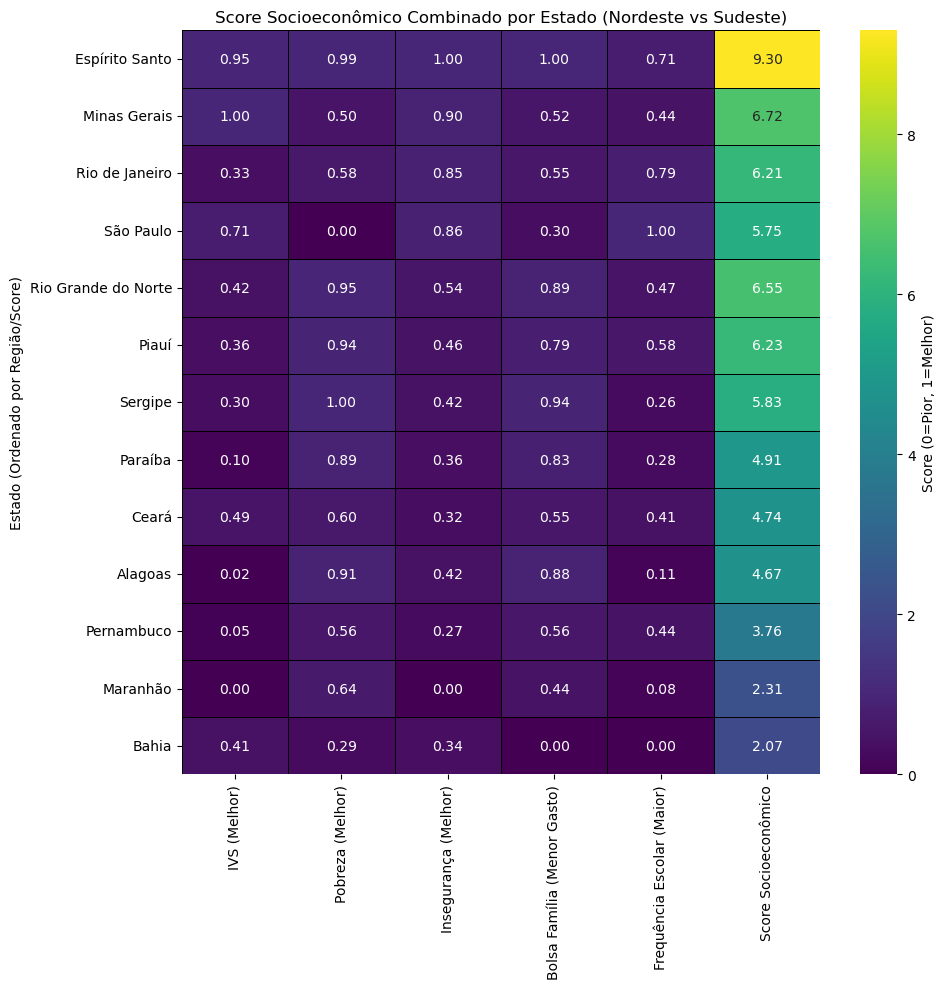

In [142]:
YEAR_IVS = '2020' 
YEAR_POBREZA = '2020' 
YEAR_FREQ_ESCOLAR = '2022' 
YEAR_INSEGURANCA = '2023' 
YEAR_BOLSA_FAMILIA = 2020 

df_estados = {}


def process_metric_by_state(file_ne, file_se, year_col, header=0, value_name=None):
    """Carrega, unifica, limpa e retorna o DF com Estado e o valor do ano."""
    try:
        df_ne = pd.read_csv(file_ne, header=header)
        df_se = pd.read_csv(file_se, header=header)

        df_ne['Regiao'] = 'Nordeste'
        df_se['Regiao'] = 'Sudeste'
        df_unificado = pd.concat([df_ne, df_se], ignore_index=True)

        df_unificado.columns = df_unificado.columns.str.strip()

        df_result = df_unificado[['Estado', 'Regiao', year_col]].copy()
        
        if year_col in df_result.columns and df_result[year_col].dtype == 'object':
            df_result.loc[:, year_col] = df_result[year_col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df_result.loc[:, year_col] = pd.to_numeric(df_result[year_col], errors='coerce')
            df_result.dropna(subset=[year_col], inplace=True)

        df_result.rename(columns={year_col: value_name}, inplace=True)
        return df_result

    except FileNotFoundError:
        print(f"ERRO: Arquivo não encontrado no caminho: {file_ne} ou {file_se}")
        return pd.DataFrame()


def process_bolsa_familia_by_state(file_ne, file_se, year):
    """Processa Bolsa Família, somando os 12 meses do ano e agregando por estado."""
    try:
        df_ne = pd.read_csv(file_ne)
        df_se = pd.read_csv(file_se)

        df_ne['Regiao'] = 'Nordeste'
        df_se['Regiao'] = 'Sudeste'
        df_unificado = pd.concat([df_ne, df_se], ignore_index=True)

        colunas_ano = [col for col in df_unificado.columns if str(year) in col and len(col.split('.')) == 2]

        value_name = f'Bolsa_Familia_Total_{year}'
        df_unificado[value_name] = 0
        
        for col in colunas_ano:
            col_numeric = pd.to_numeric(
                df_unificado[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False),
                errors='coerce'
            )
            df_unificado[value_name] += col_numeric
        
        return df_unificado[['Estado', 'Regiao', value_name]]
    
    except FileNotFoundError:
        print(f"ERRO: Arquivo não encontrado no caminho: {file_ne} ou {file_se}")
        return pd.DataFrame()


df_estados['IVS'] = process_metric_by_state(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Vulnerabilidade Social/IndiceDeVulnerabilidadeSocialNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Vulnerabilidade Social/IndiceDeVulnerabilidadeSocialSudeste.csv',
    YEAR_IVS, value_name='IVS_2020'
)

df_estados['Pobreza'] = process_metric_by_state(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/LinhaDaPobreza/numPessoasLinhaPobrezaNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/LinhaDaPobreza/numPessoasLinhaProbrezaSudeste.csv',
    YEAR_POBREZA, value_name='Pessoas_Pobreza_2020'
)

df_estados['FreqEscolar'] = process_metric_by_state(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/FrequenciaEscolar/FrequenciaEscolar18a24anosNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/FrequenciaEscolar/FrequenciaEscolar18a24anosSudeste.csv',
    YEAR_FREQ_ESCOLAR, header=1, value_name='Freq_Escolar_Perc_2022'
)

df_estados['Inseguranca'] = process_metric_by_state(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Domicílios com Insegurança Alimentar Grave/InsegurancaAlimentarNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Domicílios com Insegurança Alimentar Grave/InsegurancaAlimentarSudeste.csv',
    YEAR_INSEGURANCA, value_name='Inseguranca_Alimentar_Perc_2023'
)

df_estados['BolsaFamilia'] = process_bolsa_familia_by_state(
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Programa Bolsa Família/BolsaFamiliaNordeste.csv',
    '/home/heitor/Documents/ZettaLab/BaseDados/IPEA/Programa Bolsa Família/BolsaFamiliaSudeste.csv',
    YEAR_BOLSA_FAMILIA
)


df_master_estado = df_estados['IVS'].copy()
df_master_estado = df_master_estado.drop(columns=['Regiao']) 

for key, df_agg in df_estados.items():
    if key != 'IVS':
        if key == 'FreqEscolar':
            df_master_estado = pd.merge(df_master_estado, df_agg, on='Estado', how='inner')
        else:
            df_master_estado = pd.merge(df_master_estado, df_agg.drop(columns=['Regiao']), on='Estado', how='inner')

df_master_estado = df_master_estado.set_index('Estado')
df_heatmap_data = df_master_estado.copy() 


df_normalized = df_heatmap_data.drop(columns=['Regiao']).apply(
    lambda x: (x - x.min()) / (x.max() - x.min()), axis=0
)


df_normalized['IVS_Score'] = 1 - df_normalized['IVS_2020']
df_normalized['Pobreza_Score'] = 1 - df_normalized['Pessoas_Pobreza_2020']
df_normalized['Inseguranca_Score'] = 1 - df_normalized['Inseguranca_Alimentar_Perc_2023']
df_normalized['BolsaFamilia_Score'] = 1 - df_normalized['Bolsa_Familia_Total_2020']
df_normalized['FreqEscolar_Score'] = df_normalized['Freq_Escolar_Perc_2022'] 

score_cols = [col for col in df_normalized.columns if '_Score' in col]
df_normalized['Score_Final'] = df_normalized[score_cols].mean(axis=1) * 10


df_heatmap = df_normalized.copy()
df_heatmap['Regiao'] = df_master_estado['Regiao']

df_heatmap_plot = df_heatmap[score_cols + ['Score_Final']].copy()
df_heatmap_plot.columns = [
    'IVS (Melhor)' , 'Pobreza (Melhor)', 'Insegurança (Melhor)', 
    'Bolsa Família (Menor Gasto)', 'Frequência Escolar (Maior)', 'Score Socioeconômico'
]


df_heatmap_plot['Regiao'] = df_heatmap['Regiao']
df_heatmap_plot = df_heatmap_plot.sort_values(by=['Regiao', 'Score Socioeconômico'], ascending=[False, False])
df_heatmap_plot = df_heatmap_plot.drop(columns=['Regiao'])


plt.figure(figsize=(10, 10))
sns.heatmap(
    df_heatmap_plot, 
    cmap='viridis', 
    annot=True, 
    fmt=".2f", 
    linewidths=.5, 
    linecolor='black',
    cbar_kws={'label': 'Score (0=Pior, 1=Melhor)'}
)
plt.title('Score Socioeconômico Combinado por Estado (Nordeste vs Sudeste)')
plt.ylabel('Estado (Ordenado por Região/Score)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/home/heitor/Documents/ZettaLab/heatmap_score_socioeconomico_final.png') 
print(df_heatmap[['Score_Final']].sort_values('Score_Final', ascending=False).to_markdown(floatfmt=".2f"))

### 🔥 Heatmap do Score Socioeconômico Combinado

Este Mapa de Calor (Heatmap) é a visualização mais complexa do projeto, pois combina **todos os 5 indicadores** em um único **Score Socioeconômico Final**.

**Metodologia do Score:**
1.  Cada indicador foi normalizado para uma escala de 0 a 1 (0 = pior, 1 = melhor).
2.  Métricas negativas (IVS, Pobreza, Insegurança e Alto Gasto com Bolsa Família) foram **invertidas** para que 1 sempre signifique a melhor performance.
3.  O **Score Socioeconômico** final é a média ponderada desses 5 scores, escalada de 0 a 10.

**Interpretação (Cores):**
* **Cores Claras/Amarelas:** Alta Performance (Melhor Situação Socioeconômica).
* **Cores Escuras/Roxas:** Baixa Performance (Pior Situação Socioeconômica).

#### Principais Insights:

1.  **Dominância Regional:** O heatmap demonstra visualmente a clara divisão entre as regiões. Os estados do **Sudeste** (em geral) apresentam uma faixa mais clara (verde/amarelo) no Score Final e nas métricas individuais, indicando menor vulnerabilidade.
2.  **Liderança e Cauda:** O **Espírito Santo** (ES) lidera o ranking de forma notável, com alta performance em praticamente todas as áreas. Na cauda inferior (piores Scores), encontram-se **Maranhão (MA)** e **Alagoas (AL)**, que consistentemente apresentam as colunas mais escuras.
3.  **Variância:** Mesmo dentro das regiões, a variância existe. No Sudeste, o **Rio de Janeiro** (RJ) apresenta scores mais baixos (em algumas áreas) que o Espírito Santo e Minas Gerais. No Nordeste, estados como **Rio Grande do Norte (RN)** e **Piauí (PI)** mostram performance melhor do que o Maranhão e Alagoas.
4.  **Métricas Críticas:** As colunas que definem mais claramente o contraste são "Insegurança (Melhor)" e "Frequência Escolar (Maior)", comprovando que a educação e o combate à fome são os agentes mais discriminantes entre o bom e o mau desempenho socioeconômico regional.

# 📈 Análise de Disparidade Socioeconômica: Nordeste vs. Sudeste

Esta seção apresenta a análise comparativa dos indicadores socioeconômicos chave, consolidando o impacto das disparidades regionais. A análise explora a **Razão de Disparidade (Nordeste/Sudeste)**, que quantifica a magnitude da diferença:
* **Razão > 1:** O indicador é maior no Nordeste.
* **Razão < 1:** O indicador é maior no Sudeste.

| Indicador | Nordeste | Sudeste | Razão de Disparidade (NE/SE) | Diferença % (NE > SE) |
|:---|:---|:---|:---|:---|
| **Insegurança Alimentar (%, 2023)** | 6.04% | 2.78% | **2.18** | **117.82%** |
| **Bolsa Família (R$ Total, 2020)** | R$ 16.34 milhões | R$ 8.01 milhões | **2.04** | **103.87%** |
| **Pessoas na Linha da Pobreza (Absoluto, 2020)** | 27.93 milhões | 20.16 milhões | 1.39 | 38.54% |
| **IVS (Índice, 2020)** | 0.30 | 0.24 | 1.29 | 28.54% |
| **Frequência Escolar 18-24 anos (%, 2022)** | 19.61% | 26.63% | 0.74 | -26.34% |

---

### 🔑 Principais Insights da Disparidade

A análise da matriz de disparidade revela que os maiores impactos socioeconômicos negativos estão concentrados no Nordeste, enquanto o Sudeste demonstra superioridade no indicador de desenvolvimento humano e educacional.

#### 1. Impacto e Vulnerabilidade (Maiores Disparidades)

* **Insegurança Alimentar (2023):** Este é o indicador que revela a maior crise socioeconômica. O percentual de domicílios com insegurança alimentar no Nordeste é **117.8% maior** que o Sudeste (mais de duas vezes).
* **Bolsa Família (2020):** O volume de investimento do Bolsa Família no Nordeste é **103.9% maior** que o Sudeste. Essa alta concentração de recursos é uma resposta direta à maior necessidade e ao alto número absoluto de **Pessoas na Linha da Pobreza**, que é **38.5% maior** no Nordeste.
* **IVS (2020):** O Índice de Vulnerabilidade Social corrobora o panorama de fragilidade, indicando que o Nordeste é **28.5% mais vulnerável** socialmente que o Sudeste.

#### 2. Desenvolvimento Humano (Disparidade Invertida)

* **Frequência Escolar no Ensino Superior (2022):** Este é o único indicador onde o Nordeste apresenta um valor menor (Razão < 1). A frequência de jovens na faixa etária de 18 a 24 anos no ensino superior é **26.3% menor** no Nordeste do que no Sudeste, indicando um desafio significativo na formação de capital humano e no potencial de crescimento econômico futuro da região.
